# Modelling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from numpy import mean
from numpy import std
from numpy import median

### Load the data

In [3]:
processed_train_data_X = pd.read_csv(r"../data/preprocessed/preprocessed_book_rating_train_X.csv", delimiter = ',', header=0)
processed_train_data_X

,PublishYear,PublishMonth,PublishDay,pagesNumber,Authors_Anonymous,Authors_Carole Mortimer,Authors_Charles Fillmore,Authors_Creflo A. Dollar,Authors_M. Fethullah Gülen,Authors_Paramahansa Yogananda,...,Name_bible,Name_holy,Name_mafalda,Name_nausicaä,Name_niv,Name_novel,Name_pokemon,Name_st,Name_vine,Name_yotsuba
0,2005,6,1,48,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1991,10,1,364,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2005,3,31,32,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2004,9,1,293,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2005,7,7,352,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,1997,8,1,120,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
23059,2005,6,1,32,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
23060,1989,2,15,132,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
23061,1998,4,21,136,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
processed_train_data_y = pd.read_csv(r"../data/preprocessed/preprocessed_book_rating_train_y.csv", delimiter = ',', header=0)
processed_train_data_y

,rating_label
0,4.0
1,4.0
2,4.0
3,4.0
4,3.0
...,...
23058,4.0
23059,4.0
23060,4.0
23061,4.0


In [5]:
train_test_ratio = 0.8
split_position = int(train_test_ratio * processed_train_data_X.shape[0])
y_train = processed_train_data_y.iloc[:split_position]
y_test = processed_train_data_y.iloc[split_position:]
X_train = processed_train_data_X.iloc[:split_position]
X_test = processed_train_data_X.iloc[split_position:]

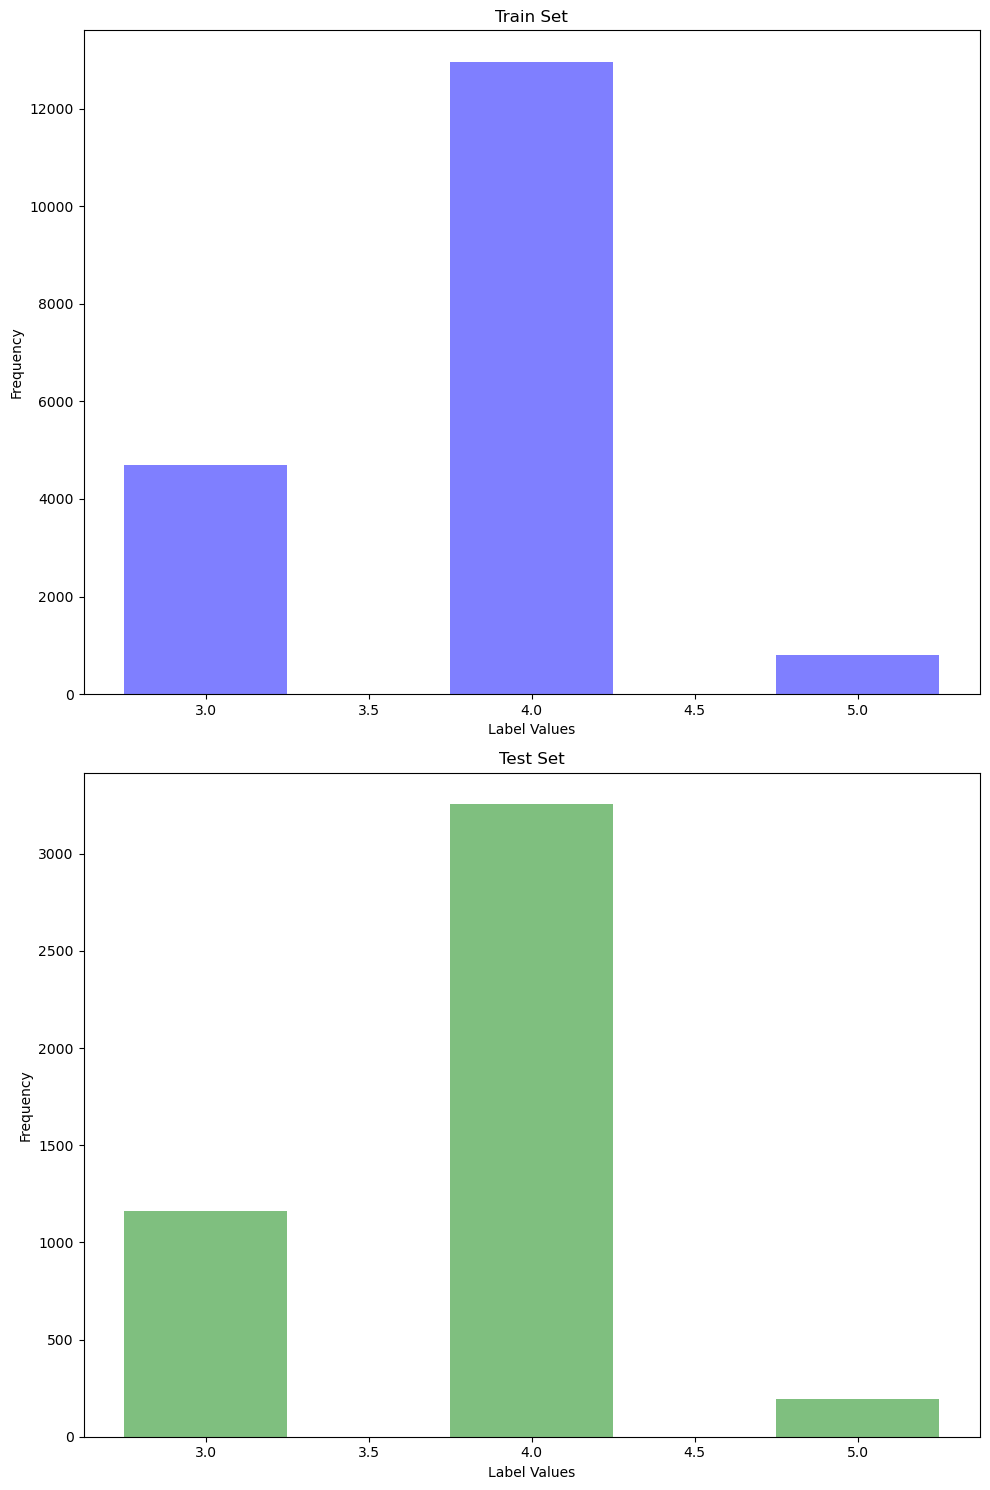

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

axs[0].hist(y_train.values.flatten(), bins=np.arange(start=3, stop=7)-0.5, alpha=0.5, color='blue', rwidth=0.5)
axs[0].set_xlabel('Label Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Train Set')

axs[1].hist(y_test.values.flatten(), bins=np.arange(start=3, stop=7)-0.5, alpha=0.5, color='green', rwidth=0.5)
axs[1].set_xlabel('Label Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Test Set')

# Display the plot
plt.tight_layout()
plt.savefig("../plots/data_dist.png")

## 2.1. Baseline model (0-R)

In [7]:
zero_r = DummyClassifier(strategy='most_frequent')
zero_r.fit(X_train, y_train)
zr_pred = zero_r.predict(X_test)

## 2.2. Logistic Regression

#### (a) Logistic Regression without any penalties

In [8]:
# Define the parameter grid to search over
param_grid = {'max_iter': [100, 500, 750, 1000, 5000, 10000]}

lgr = LogisticRegression(penalty=None)
warnings.simplefilter(action='ignore', category=UserWarning)

# Use GridSearchCV to find the best max_iter value
noPen_grid_search = GridSearchCV(lgr, param_grid, cv=3, verbose=2)
noPen_grid_result = noPen_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=500; total time=   0.1s
[CV] END .......................................max_iter=500; total time=   0.0s
[CV] END .......................................max_iter=500; total time=   0.2s
[CV] END .......................................max_iter=750; total time=   0.2s
[CV] END .......................................max_iter=750; total time=   0.0s
[CV] END .......................................max_iter=750; total time=   0.3s
[CV] END ......................................max_iter=1000; total time=   0.2s
[CV] END ......................................max_iter=1000; total time=   0.0s
[CV] END ......................................ma

In [9]:
# summarize results
noPen_best_par = noPen_grid_search.best_params_['max_iter']
noPen_means = noPen_grid_result.cv_results_['mean_test_score']
noPen_stds = noPen_grid_result.cv_results_['std_test_score']
noPen_params = noPen_grid_result.cv_results_['params']
noPen_result_df = pd.DataFrame(noPen_params)
noPen_means_std_df = pd.DataFrame({"Mean": noPen_means, "Standard Deviation": noPen_stds})
noPen_result_df = pd.concat([noPen_result_df, noPen_means_std_df], axis=1)

print("Best: %f using %s" % (noPen_grid_result.best_score_, noPen_grid_result.best_params_))
noPen_result_df   

Best: 0.702547 using {'max_iter': 500}


,max_iter,Mean,Standard Deviation
0,100,0.702385,0.000406
1,500,0.702547,0.000466
2,750,0.702547,0.000466
3,1000,0.702547,0.000466
4,5000,0.702547,0.000466
5,10000,0.702547,0.000466


In [10]:
print("Best max_iter value:", noPen_best_par)
noPen_lgr_best = LogisticRegression(max_iter = noPen_best_par)

Best max_iter value: 500


In [11]:
noPen_lgr_best.fit(X_train, y_train)
noPenLgr_pred = noPen_lgr_best.predict(X_test)

#### (b) Logistic Regression with regularisation penalties

In [12]:
model = LogisticRegression()
warnings.simplefilter(action='ignore', category=UserWarning)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

C:\Users\hoand\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hoand\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [13]:
# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
result_df = pd.DataFrame(params)
means_std_df = pd.DataFrame({"Mean": means, "Standard Deviation": stds})
result_df = pd.concat([result_df, means_std_df], axis=1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
result_df         

Best: 0.710732 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


,C,penalty,solver,Mean,Standard Deviation
0,100.00,l2,newton-cg,0.710732,0.002899
1,100.00,l2,lbfgs,0.702313,0.000976
2,100.00,l2,liblinear,0.703071,0.001313
3,10.00,l2,newton-cg,0.710696,0.002887
4,10.00,l2,lbfgs,0.702313,0.001081
5,10.00,l2,liblinear,0.703234,0.001296
6,1.00,l2,newton-cg,0.709033,0.002618
7,1.00,l2,lbfgs,0.702493,0.001165
8,1.00,l2,liblinear,0.703107,0.001318
9,0.10,l2,newton-cg,0.707678,0.002520


In [14]:
pen_lgr_best = LogisticRegression(penalty="l2", solver="newton-cg", C=100,)
pen_lgr_best.fit(X_train, y_train)
penLgr_pred = pen_lgr_best.predict(X_test)

C:\Users\hoand\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hoand\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


## 2.3. Boosting with AdaBoost

#### (a) The Default AdaBoost
AdaBoost with 50 (default) Decision Stumps (One-R) model as base classifiers

In [15]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)
default_ada_pred = ada_boost.predict(X_test)

#### (b) Change the number of Trees in base classifiers
AdaBoost with different number of Decision Stumps (One-R) model as base classifiers

In [16]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [17]:
# Create a list of different models with different number of trees
def get_adaBoosts():
    ada_boosts = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 1500]
    
    for n in n_trees:
        ada_boosts[n] = AdaBoostClassifier(n_estimators=n)
    return ada_boosts

In [18]:
ada_boosts_ = get_adaBoosts()

scores_dict = dict()

for trees_num, model in ada_boosts_.items():
    scores = evaluate_model(model, X_train, y_train)
    print('>%s %.3f (%.3f)' % (trees_num, mean(scores), std(scores)))
    scores_dict[trees_num] = scores

>10 0.704 (0.002)
>50 0.709 (0.003)
>100 0.709 (0.003)
>500 0.709 (0.003)
>1000 0.708 (0.003)
>1500 0.708 (0.003)


In [19]:
mean_, median_, std_ = [], [], []
for n_trees in scores_dict.keys():
    curr_scores = scores_dict[n_trees]
    mean_.append(mean(curr_scores) * 100)
    median_.append(median(curr_scores) * 100)
    std_.append(std(curr_scores) * 100)

scores_df = pd.DataFrame({"n_trees": [10, 50, 100, 500, 1000, 1500], "mean": mean_, "median": median_, "std": std_})
scores_df = scores_df.set_index("n_trees")
scores_df

,mean,median,std
n_trees,,,
10,70.373984,70.352304,0.164160
50,70.917796,70.921409,0.289075
100,70.928636,70.975610,0.260119
500,70.858175,70.867209,0.298295
1000,70.838302,70.840108,0.300307
1500,70.816621,70.785908,0.291101


<function matplotlib.pyplot.show(close=None, block=None)>

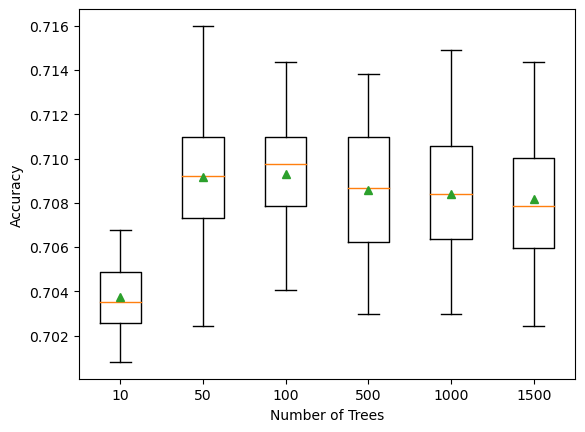

In [20]:
fig, ax = plt.subplots()
ax.set(xlabel = "Number of Trees", ylabel = "Accuracy")
plt.boxplot(scores_dict.values(), labels=scores_dict.keys(), showmeans=True)
plt.show

We choose 100 as the best numbers of trees for AdaBoosting.

In [21]:
nTrees_ada_boost = AdaBoostClassifier(n_estimators=100)
nTrees_ada_boost.fit(X_train, y_train)
nTressAda_pred = nTrees_ada_boost.predict(X_test)

#### (c) Change the depth of the base classifier
AdaBoost with 50 Decision Trees as the base classifiers

In [22]:
# Create a list of different models with different number of trees depth
def get_adaBoosts():
    ada_boosts = dict()
    # define number of trees to consider
    max_depths = 11
    
    for n in range(1, max_depths):
        base_dt = DecisionTreeClassifier(max_depth=n)
        ada_boosts[n] = AdaBoostClassifier(base_estimator=base_dt)
    return ada_boosts

In [23]:
ada_boosts_ = get_adaBoosts()

d_scores_dict = dict()

for depth, model in ada_boosts_.items():
    scores = evaluate_model(model, X_train, y_train)
    d_scores_dict[depth] = scores

<function matplotlib.pyplot.show(close=None, block=None)>

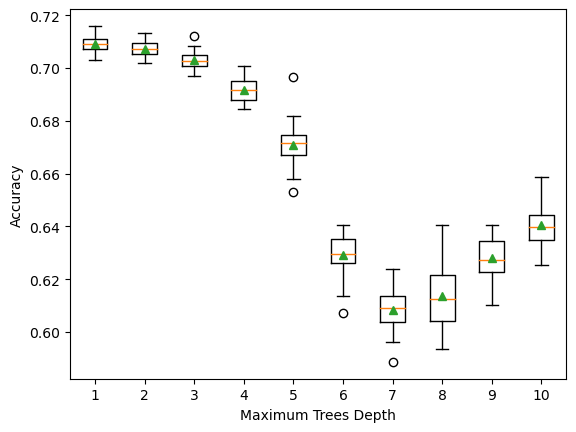

In [24]:
fig, ax = plt.subplots()
ax.set(xlabel = "Maximum Trees Depth", ylabel = "Accuracy")
plt.boxplot(d_scores_dict.values(), labels=d_scores_dict.keys(), showmeans=True)
plt.show

In [25]:
mean_, median_, std_ = [], [], []
for depth in d_scores_dict.keys():
    curr_scores = d_scores_dict[depth]
    mean_.append(mean(curr_scores) * 100)
    median_.append(median(curr_scores) * 100)
    std_.append(std(curr_scores) * 100)

d_scores_df = pd.DataFrame({"depth": range(1, 11), "mean": mean_, "median": median_, "std": std_})
d_scores_df = d_scores_df.set_index("depth")
d_scores_df

,mean,median,std
depth,,,
1,70.923216,70.921409,0.282583
2,70.720867,70.731707,0.297001
3,70.303523,70.271003,0.342894
4,69.176152,69.186992,0.451342
5,67.069557,67.154472,0.784028
6,62.908762,62.953930,0.787599
7,60.843722,60.894309,0.769277
8,61.374887,61.246612,1.145200
9,62.789521,62.710027,0.789511


Suprisingly, the model using the Decision Stumps (One-R) produce the highest accuracy.

## Evaluation

In [26]:
print("Zero-R Accuracy: {:.2f}%".format(zero_r.score(X_test, y_test) * 100))
print("No Penalty Logistic Regression Accuracy: {:.2f}%".format(noPen_lgr_best.score(X_test, y_test) * 100))
print("With Penalty Logistic Regression Accuracy: {:.2f}%".format(pen_lgr_best.score(X_test, y_test) * 100))
print("Default AdaBoostAccuracy: {:.2f}%".format(ada_boost.score(X_test, y_test) * 100))
print("100-Tree Accuracy: {:.2f}%".format(nTrees_ada_boost.score(X_test, y_test) * 100))

Zero-R Accuracy: 70.54%
No Penalty Logistic Regression Accuracy: 70.50%
With Penalty Logistic Regression Accuracy: 71.17%
Default AdaBoostAccuracy: 71.17%
100-Tree Accuracy: 71.13%


##### Confusion Matrix

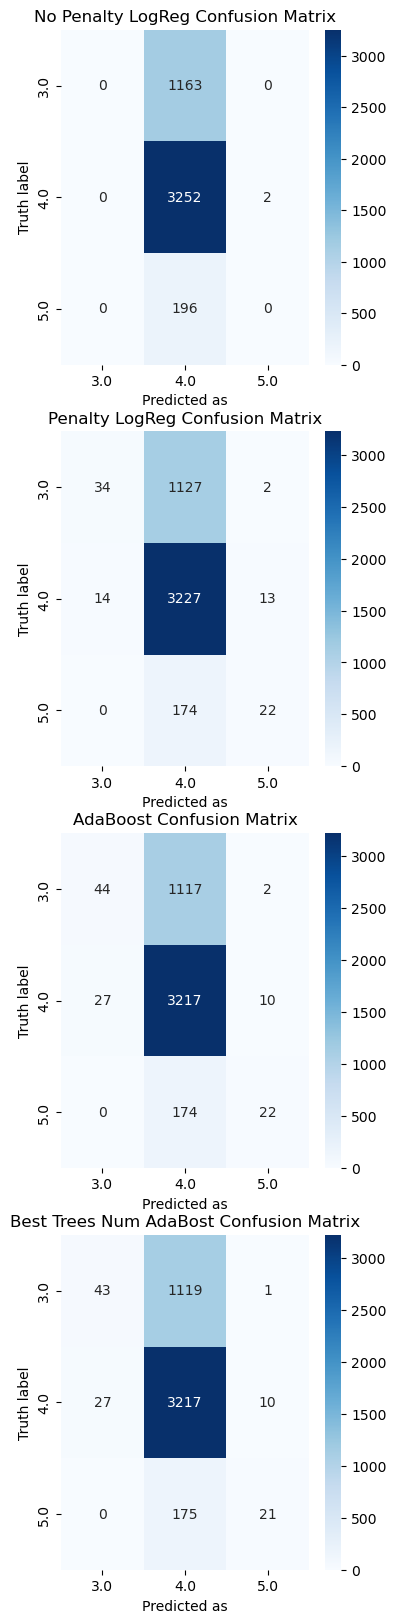

In [28]:
unique_labels, label_counts = np.unique(processed_train_data_y, return_counts=True)

_, ax = plt.subplots(nrows=4, ncols=1, figsize=(4,20))

zr_cf = confusion_matrix(y_test,zr_pred)
noPenLgr_cf = confusion_matrix(y_test,noPenLgr_pred)
penLgr_cf = confusion_matrix(y_test,penLgr_pred)
defaultAda_cf = confusion_matrix(y_test,default_ada_pred)
nTreesAda_cf = confusion_matrix(y_test,nTressAda_pred)

titles = ['No Penalty LogReg','Penalty LogReg', 'AdaBoost', 'Best Trees Num AdaBost']

for i,cf in enumerate([noPenLgr_cf,penLgr_cf,defaultAda_cf, nTreesAda_cf]):
    sns.heatmap(cf, ax=ax[i], 
                cmap = 'Blues',
                fmt = 'd',
                xticklabels=unique_labels, 
                yticklabels=unique_labels, 
                annot=True)
    ax[i].set_title(f'{titles[i]} Confusion Matrix')
    ax[i].set_ylabel('Truth label')
    ax[i].set_xlabel('Predicted as')

plt.savefig("../plots/cfs.png")

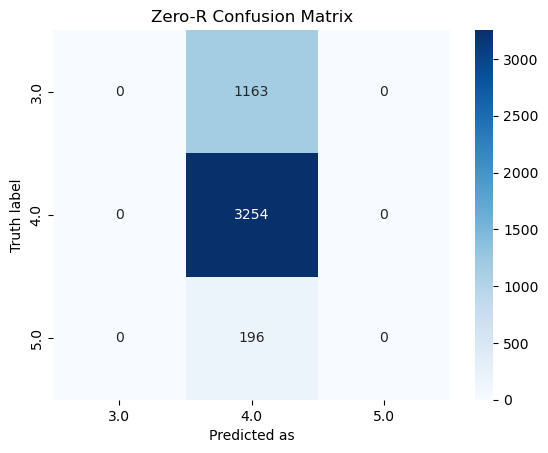

In [29]:
_, ax = plt.subplots()
cf = zr_cf
sns.heatmap(cf, ax=ax, 
            cmap = 'Blues',
            fmt = 'd',
            xticklabels=unique_labels, 
            yticklabels=unique_labels, 
            annot=True)
ax.set_title(f'Zero-R Confusion Matrix')
ax.set_ylabel('Truth label')
ax.set_xlabel('Predicted as')

plt.savefig("../plots/zr_cf.png")

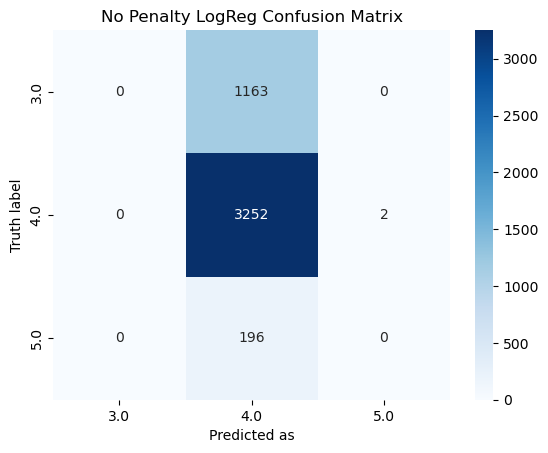

In [30]:
_, ax = plt.subplots()
cf = noPenLgr_cf
sns.heatmap(cf, ax=ax, 
            cmap = 'Blues',
            fmt = 'd',
            xticklabels=unique_labels, 
            yticklabels=unique_labels, 
            annot=True)
ax.set_title(f'No Penalty LogReg Confusion Matrix')
ax.set_ylabel('Truth label')
ax.set_xlabel('Predicted as')

plt.savefig("../plots/noPen_cf.png")

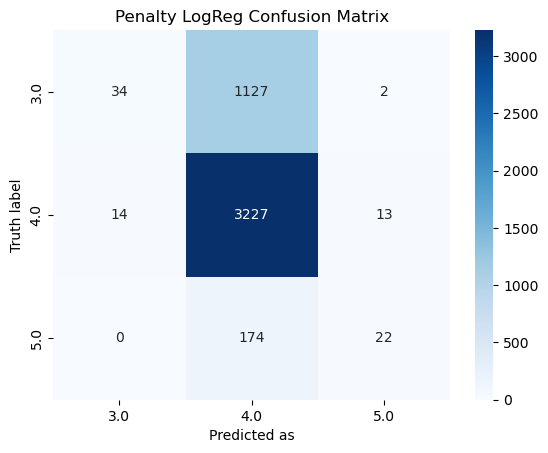

In [31]:
_, ax = plt.subplots()
cf = penLgr_cf
sns.heatmap(cf, ax=ax, 
            cmap = 'Blues',
            fmt = 'd',
            xticklabels=unique_labels, 
            yticklabels=unique_labels, 
            annot=True)
ax.set_title(f'Penalty LogReg Confusion Matrix')
ax.set_ylabel('Truth label')
ax.set_xlabel('Predicted as')

plt.savefig("../plots/Pen_cf.png")

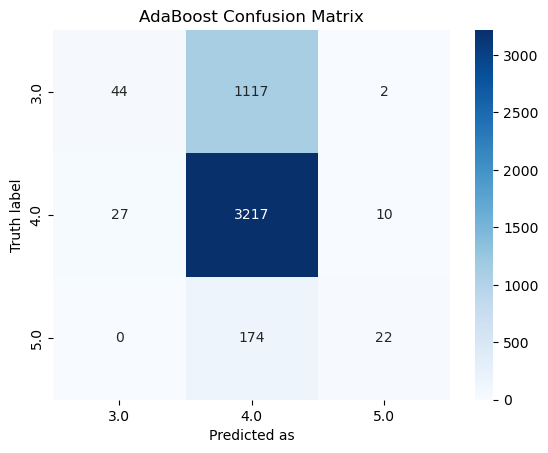

In [32]:
_, ax = plt.subplots()
cf = defaultAda_cf
sns.heatmap(cf, ax=ax, 
            cmap = 'Blues',
            fmt = 'd',
            xticklabels=unique_labels, 
            yticklabels=unique_labels, 
            annot=True)
ax.set_title(f'AdaBoost Confusion Matrix')
ax.set_ylabel('Truth label')
ax.set_xlabel('Predicted as')

plt.savefig("../plots/Ada.png")

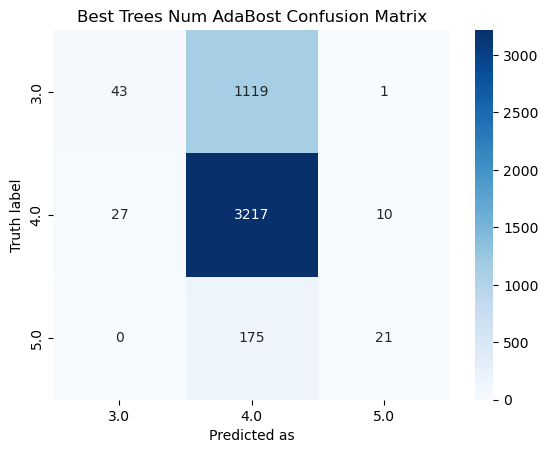

In [33]:
_, ax = plt.subplots()
cf = nTreesAda_cf
sns.heatmap(cf, ax=ax, 
            cmap = 'Blues',
            fmt = 'd',
            xticklabels=unique_labels, 
            yticklabels=unique_labels, 
            annot=True)
ax.set_title(f'Best Trees Num AdaBost Confusion Matrix')
ax.set_ylabel('Truth label')
ax.set_xlabel('Predicted as')

plt.savefig("../plots/treeAda.png")

### Save the model

In [ ]:
import joblib

In [ ]:
joblib.dump(zero_r, r'../model/zero_R.pkl')

In [ ]:
joblib.dump(zero_r, r'../model/zero_R.pkl')

In [ ]:
joblib.dump(zero_r, r'../model/zero_R.pkl')

In [ ]:
joblib.dump(zero_r, r'../model/zero_R.pkl')

In [ ]:
joblib.dump(zero_r, r'../model/zero_R.pkl')